# KickStarter

KickStarter is a Crowdfunding project which is a great way to raise money for a project without taking out a loan. which makes it really easy for people to show others what their idea is and why it is worthwhile. However, since a crowdfunding campaign can make or break a business idea or career it is worth the time to investigate whether there are any keys to succeeding.

Analysis of Kickstarter projects from 2009-2017 to determine the factors which contribute to success.

### Business Questions
* What are the factors in the success of a Kickstarter project
* What category of project would most likely succeed (Art, Photography, Tech etc.)
* What should be the best duration for project to succeed.
* What is the best origin for project to be launched.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [2]:
# Read both the csv files
df_2016 = pd.read_csv("kickstarter-projects/ks-projects-201612.csv", encoding="ISO-8859-1")
df_2018 = pd.read_csv("kickstarter-projects/ks-projects-201801.csv", encoding="ISO-8859-1")

/Users/bhavinivyas/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Convert 2016 csv file to pandas daataframe.
df_2016.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [4]:
# Convert 2018 csv file to pandas dataframe
df_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
# Count rows to see if there is any null value in any column.
print(df_2018.count())

ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64


In [6]:
# Count rows to see if there is any null value in any column.
df_2016.count()

ID                323750
name              323746
category          323745
main_category     323750
currency          323750
deadline          323750
goal              323750
launched          323750
pledged           323750
state             323750
backers           323750
country           323750
usd pledged       319960
Unnamed: 13          625
Unnamed: 14           12
Unnamed: 15            4
Unnamed: 16            1
dtype: int64

In [7]:
# Compare both the file to see number of rows and columns
print(df_2016.shape)
print(df_2018.shape)

(323750, 17)
(378661, 15)


In [8]:
# Look at the type of each column
df_2018.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [9]:
# Look at the type of each column
df_2016.dtypes

ID                  int64
name               object
category           object
main_category      object
currency           object
deadline           object
goal               object
launched           object
pledged            object
state              object
backers            object
country            object
usd pledged        object
Unnamed: 13        object
Unnamed: 14        object
Unnamed: 15        object
Unnamed: 16       float64
dtype: object

**Sort Both dataframes "deadline" column and see if both are same or not**

In [10]:
# Convert "deadline column to datetime"
df_2018["deadline"] = pd.to_datetime(df_2018["deadline"])

In [11]:
# sort date in deadline column
df_2018["deadline"].sort_values().head()

138572   2009-05-03
213711   2009-05-16
342226   2009-05-16
28960    2009-05-20
196244   2009-05-22
Name: deadline, dtype: datetime64[ns]

In [12]:
# dataframe df_2016 "deadline" column was not accessible, so check the column name. 
df_2016.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [13]:
# And it is seen that "dealine" column name contains extra space at the end. so remove the space.
df_2016.columns = [s.replace(" ", "") for s in df_2016.columns]

In [14]:
df_2016.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usdpledged', 'Unnamed:13', 'Unnamed:14', 'Unnamed:15', 'Unnamed:16'],
      dtype='object')

In [15]:
# Also "deadline column contains some extra text fields like "USD", "GBP" (instead of date).
df_2016["deadline"].value_counts().head()

USD                    508
GBP                     64
2012-01-01 05:59:00     47
2015-01-01 05:59:00     41
2014-11-01 04:59:00     38
Name: deadline, dtype: int64

In [16]:
d = df_2016[df_2016['deadline'] == 'USD']

In [17]:
# looks like column values have been misplaced at some point in df_2016
d

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usdpledged,Unnamed:13,Unnamed:14,Unnamed:15,Unnamed:16
1563,1009317190,French Cuisine,A Traditional Experience,Cookbooks,Food,USD,2014-09-08 00:46:23,13730,2014-08-09 03:16:02,3984,failed,46,US,3984,NaN,NaN,NaN
1794,1010871699,The Beginners Guide to being Unsuicidal,the one act,Theater,Theater,USD,2011-12-31 23:25:46,5000,2011-11-21 23:25:46,525,failed,10,US,525,NaN,NaN,NaN
1931,1011687764,Best OnLine Classifieds,Ever / No More Spam,Web,Technology,USD,2014-09-20 19:56:10,6300,2014-08-21 19:56:10,0,failed,0,US,0,NaN,NaN,NaN
2420,101453314,Social Media Ruined My Life,A Short Film from Adam S Curtis,Shorts,Film & Video,USD,2013-03-14 20:11:57,3000,2013-02-25 21:11:57,3035,successful,42,US,3035,NaN,NaN,NaN
4850,1028998661,The Easyhook Driver Bit,Cuphook Installation Made Easy,Hardware,Technology,USD,2014-09-28 02:22:52,25000,2014-07-30 02:22:52,590,failed,35,US,590,NaN,NaN,NaN
4871,102911383,AVES: Bicycle playing cards,Fine Art deck inspired by Birds,Playing Cards,Games,USD,2014-10-07 18:00:29,10000,2014-09-01 18:00:29,23924,successful,780,US,23924,NaN,NaN,NaN
5049,1030235554,Love's in Need Of Love,Now.,World Music,Music,USD,2013-03-13 00:00:00,12000,2013-02-08 23:58:25,12306,successful,122,US,12306,NaN,NaN,NaN
5813,1034539612,Batman Dead End,A Ten Year Retrospective,Film & Video,Film & Video,USD,2013-03-28 15:03:32,12500,2013-02-26 16:03:32,13675,successful,213,US,13675,NaN,NaN,NaN
7003,1041248261,KittyHawk,3 GoPro cameras 1 UAV ultimate quadcopter drone,Camera Equipment,Technology,USD,2015-08-10 10:52:33,75000,2015-07-10 10:52:33,4690,canceled,3,US,4690,NaN,NaN,NaN
7639,1044922583,Lyrical Strings Duo,A Violin and Classical Guitar Album,Classical Music,Music,USD,2012-02-04 23:14:13,2500,2012-01-05 23:14:13,4488.01,successful,126,US,4488.01,NaN,NaN,NaN


In [18]:
# remove unneccessary rows which contains text like 'USD', 'GBP' in deadline
clean_df_2016 = df_2016[(df_2016['deadline'] != 'USD') & (df_2016['deadline'] != 'GBP') & (df_2016['deadline'] != 'SEK')]
# df_2016.drop(df_2016.loc[df_2016['deadline']==0].index, inplace=True)

In [19]:
clean_df_2016["deadline"].value_counts()

2012-01-01 05:59:00    47
2015-01-01 05:59:00    41
2014-11-01 04:59:00    38
2012-03-01 05:59:00    33
2016-01-01 05:59:00    31
2010-09-01 05:59:00    30
2014-09-01 05:59:00    30
2012-02-01 05:59:00    30
2010-08-01 05:59:00    29
2012-11-01 04:59:00    29
2016-04-01 05:59:00    29
2012-06-01 05:59:00    29
2015-03-01 05:59:00    29
2015-04-01 05:59:00    28
2013-01-01 05:59:00    27
2012-04-01 05:59:00    26
2011-01-01 05:59:00    26
2013-02-01 05:59:00    26
2015-05-01 05:59:00    25
2015-11-01 04:59:00    25
2014-12-01 05:59:00    24
2014-01-01 05:59:00    24
2013-03-01 05:59:00    24
2016-11-01 04:59:00    24
2015-07-01 05:59:00    24
2014-10-01 05:59:00    23
2015-01-01 08:59:00    23
2012-09-01 05:59:00    23
2011-11-01 04:59:00    22
2012-12-01 05:59:00    22
                       ..
2016-01-31 19:42:17     1
2010-06-21 00:30:00     1
2015-06-10 06:20:00     1
2016-03-21 16:41:00     1
2011-09-29 15:41:31     1
2016-10-22 12:58:49     1
2013-12-06 22:47:13     1
2014-11-21 1

In [20]:
# clean_df_2016.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
# clean_df_2016[clean_df_2016["deadline"]] = clean_df_2016[clean_df_2016["deadline"]].apply(pd.to_datetime, errors='coerce').dropna()


In [21]:
df_2016['deadline'].sort_values().head()

269970               Esoteric
118552    2009-05-03 08:59:59
292628    2009-05-16 01:10:00
182855    2009-05-16 11:59:00
24856     2009-05-20 21:50:00
Name: deadline, dtype: object

#### Differences between 2016 and 2018 csv file (should we consider both or one. if one then which one):
- the 2018 file is an extension of the 2016 file
    - 2018 file has about 55,000 more entries
- 2016 file has an extra two columns, but these are mostly null values so we would drop these columns anyway

Final conclusion is that we should just use the 2018 dataset for the analysis of Kickstarter Projects, just because it is essentially a more substantial dataset


## Data Cleaning

In [22]:
df_2018.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [23]:
df_2018["category"].value_counts()

Product Design       22314
Documentary          16139
Music                15727
Tabletop Games       14180
Shorts               12357
Video Games          11830
Food                 11493
Film & Video         10108
Fiction               9169
Fashion               8554
Nonfiction            8318
Art                   8253
Apparel               7166
Theater               7057
Technology            6930
Rock                  6758
Children's Books      6756
Apps                  6345
Publishing            6018
Webseries             5762
Photography           5752
Indie Rock            5657
Narrative Film        5188
Web                   5153
Comics                4996
Crafts                4664
Country & Folk        4451
Design                4199
Hip-Hop               3912
Hardware              3663
                     ...  
Couture                275
Blues                  268
Animals                255
Fabrication Tools      250
Makerspaces            238
Printing               238
M

In [24]:
df_2018["main_category"].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [25]:
print(len(df_2018.category.unique()))
print(len(df_2018.main_category.unique())) 

159
15


***Main_category will be helpful to keep dimentionality low after one hot encoding***

In [26]:
print(len(df_2018.ID.unique()))
print(df_2018.count())

378661
ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64


In [27]:
# df_2018.shape
# df_2018.shape[0]
# df_2018.shape[1]
df_2018.shape[0]==len(df_2018.ID.unique())

True

***ID is unique but doesn't contain any info***

After looking at all the features we can drop following columns:

* 'goal' as it is in local currency, and it would be easier to work with usd_goal_real
* 'currency' as we are dropping 'goal' and will just use the information that is already converted to USD
* 'usd pledged' as it has lots of missing values, it is kickstarter information given about pledge amount in USD but this is already included in usd_pledged_real
* 'pledged' is funding raised in local currency
* 'category' as main_category retains a lot of information, and will still increase our number of features quite significantly when one hot encoded. If we were to try to one hot encode category the dimensionality of our data would be very high.
* 'ID' as all of the ID fields are unique, and it will not give us any information about project success.

In [28]:
#convert "launched" column to common datetime format
df_2018.launched = pd.to_datetime(df_2018.launched)


In [29]:
df_2018.country.value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [30]:
#N,0" engineering to 'NO'
# Assuming that it is mistake and replacing "N,0" to "NO"
df_2018.country = df_2018.country.replace(to_replace='N,0"', value='NO')

It is good to engineer a success variable from the information that is already in the dataset. Project receiving pleadged as much as their goal or greater than their goal then considering those as successful projects. This is also how Kickstarter defines success.

In [31]:
#engineer a 'success' variable
df_2018['success'] = (df_2018.usd_goal_real <= df_2018.usd_pledged_real)*1

In [32]:
df_2018

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,success
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,1
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,0


In [33]:
df_2018.success.describe()

count    378661.000000
mean          0.361912
std           0.480554
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: success, dtype: float64

It is good to engineer a duration feature to see if the timeline of a project influences the chances at success. The dataset contains information about the date and time a project was launched, and what the fundraising deadline was. From this it is straightforward to calculate how many hours the fundraising was supposed to last.

In [34]:
#engineer duration variable
df_2018['duration'] = (df_2018.deadline - df_2018.launched).astype('timedelta64[h]')

In [35]:
df_2018.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,success,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,1403.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,1435.0


Let's represent categorial variables to binary. This can be done via one hot encode pandas get_dummies method.
* Here main_category and Country are getting converted to binary state. For example if project is of Art category then that column will have "1" value and all others will have "0". Same for country, if project is originated in "US" the "US" column will have one value and other columns will have 0 value for that project.
* This will make it easier for any models we deal by quantifying non-numerical values.

In [36]:
#one hot encode categorical variables, dropping unneeded variables
encoded_df_2018 = pd.get_dummies(df_2018.drop(labels=['name', 'launched', 'deadline', 'state',
                                            'category', 'currency', 'usd pledged', 'pledged',
                                            'ID', 'goal'], axis=1), 
                            columns=['main_category', 'country'])

The average amount contributed to a project can give us some insight about whether we want to encourage many small contributions or a few larger ones.

In [37]:
#add a variable that shows average pledge for each project
encoded_df_2018['average_backing'] = (encoded_df_2018['usd_pledged_real']/(encoded_df_2018['backers']+1))

In [38]:
encoded_df_2018.head(2)

,backers,usd_pledged_real,usd_goal_real,success,duration,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,...,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,average_backing
0,0,0.0,1533.95,0,1403.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0000
1,15,2421.0,30000.00,0,1435.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,151.3125


# Data Analysis

Let's understand the data for Kickstarter projects. This includes things like places of origin, predominant categories, durations, goals etc.

In [39]:
def plot_percentage(data, title):
    ax = data.plot(kind='bar')
    plt.title(title)
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.show();

In [40]:
projPerByCountry = (df_2018.country.value_counts()/df_2018.shape[0])*100
projPerByCountry

US    77.279414
GB     8.892387
CA     3.896889
AU     2.070189
NO     1.189719
DE     1.101513
FR     0.776156
IT     0.760047
NL     0.757406
ES     0.601065
SE     0.464003
MX     0.462683
NZ     0.382136
DK     0.293930
IE     0.214176
CH     0.200971
HK     0.163207
BE     0.162943
AT     0.157661
SG     0.146569
LU     0.016373
JP     0.010564
Name: country, dtype: float64

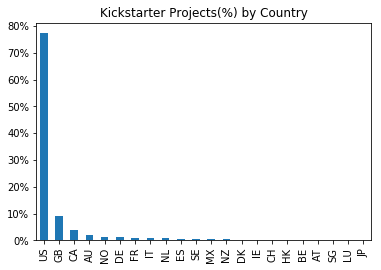

In [41]:
plot_percentage(projPerByCountry, "Kickstarter Projects(%) by Country")


### Hightest projects were launched in US

In [42]:
# country_success = df_2018[df_2018.usd_pledged_real>=df_2018.usd_goal_real].country.value_counts()/\
#               df_2018[df_2018.usd_pledged_real>=df_2018.usd_goal_real].shape[0]*100

country_success = (df_2018[df_2018.success==1].country.value_counts())/(df_2018[df_2018.success==1].shape[0])*100
country_success


US    80.457086
GB     8.908218
CA     3.086645
AU     1.503919
NO     1.403949
DE     0.700515
FR     0.672057
NL     0.458254
SE     0.381635
ES     0.368500
IT     0.334934
NZ     0.329826
MX     0.299908
DK     0.272909
HK     0.173669
IE     0.152508
SG     0.141562
CH     0.140833
BE     0.111645
AT     0.082456
LU     0.013864
JP     0.005108
Name: country, dtype: float64

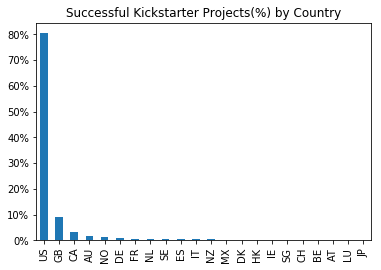

In [43]:
#successful projects by country
plot_percentage(country_success, 
             "Successful Kickstarter Projects(%) by Country")

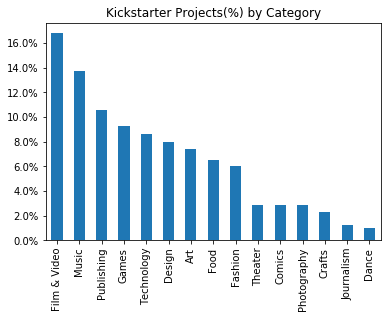

In [44]:
plot_percentage((df_2018.main_category.value_counts()/df_2018.shape[0]*100), 
             "Kickstarter Projects(%) by Category")


### Most of the projects were of Film and Video category

In [45]:
success_proj_category = df_2018[df_2018.success==1].main_category.value_counts()/\
              df_2018[df_2018.success== 1].shape[0]*100

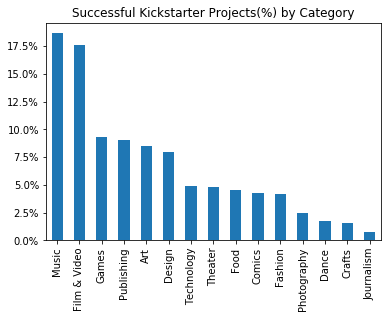

In [46]:
#categories of successful projects
plot_percentage(success_proj_category, 
             "Successful Kickstarter Projects(%) by Category")

### Most of the successful projects were from music category

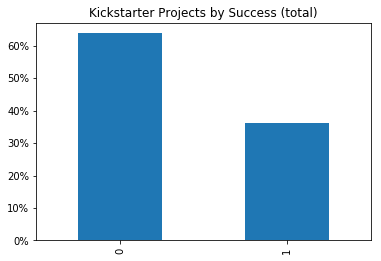

In [47]:
plot_percentage((df_2018.success.value_counts()/df_2018.shape[0]*100),
             "Kickstarter Projects by Success (total)")

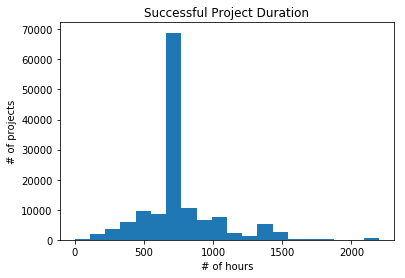

In [48]:
# Histogram showing successful projects duration
plt.hist(df_2018[df_2018.success==1].duration, bins=20)
plt.title('Successful Project Duration')
plt.xlabel('# of hours')
plt.ylabel('# of projects');

### Projects with duration (projects launched - fundraising deadline) of 700 hours have high chances to be successful.

In [49]:
def fmt_x(x, y):
    if x>=1000:
        val = int(x)/1000
        return '{val:d}K'.format(val=int(val))
    else:
        return int(x)

In [50]:
df_2018['launch_month']=df_2018['launched'].dt.month
df_2018['launch_year']=df_2018['launched'].dt.year

In [51]:
year_df=df_2018[df_2018['launch_year']!=1970]

In [52]:
proj_x_year=year_df[year_df['launch_year']!=2018].groupby('launch_year')['ID'].count()
proj_x_year

launch_year
2009     1329
2010    10519
2011    26237
2012    41165
2013    44851
2014    67745
2015    77300
2016    57184
2017    52200
Name: ID, dtype: int64

#### Historical Trend of KickStarter Count of Projects from 2009-2017

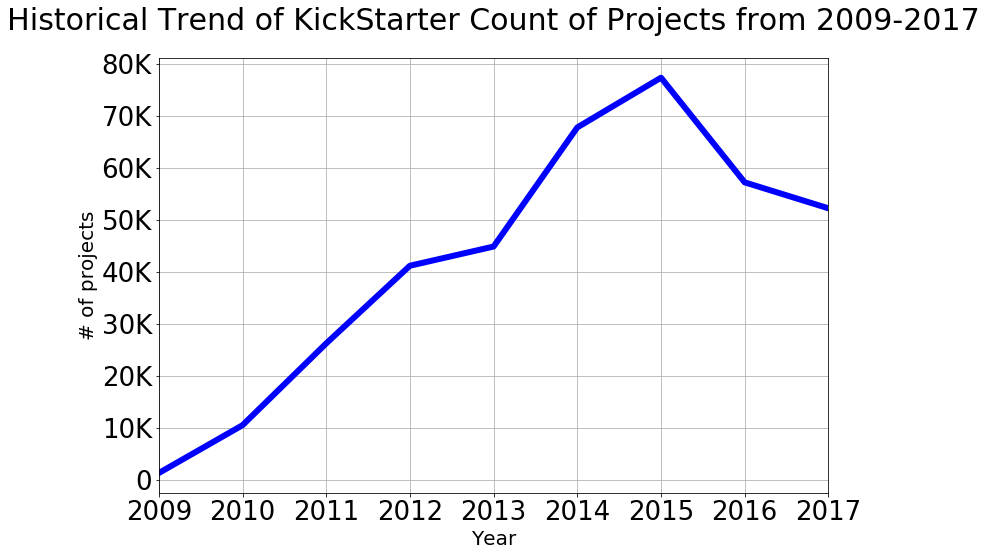

In [53]:
# Historical Trend of KickStarter Count of Projects from 2009-2017
fig=proj_x_year.plot(kind='line', fontsize=26, grid=True, color='blue', linewidth=6, figsize=(12, 8))
plt.title("Historical Trend of KickStarter Count of Projects from 2009-2017", fontsize=30, y=1.05)
plt.xlabel("Year", fontsize=20)
plt.ylabel("# of projects", fontsize=20)
fig.yaxis.set_major_formatter(plt.FuncFormatter(fmt_x))
plt.show()

### It has been seen that in 2009, KickStarter grew steadily and it was highest in 2015 and has started to slow down after that.

In [54]:
# df's for successful and failed project counts by year
failed_proj_year=year_df[(year_df['launch_year']!=2018) & (year_df['success']==False)].groupby('launch_year')['ID'].count()
succ_proj_year=year_df[(year_df['launch_year']!=2018) & (year_df['success']==True)].groupby('launch_year')['ID'].count()


#### Historical Trend Success vs. Failure

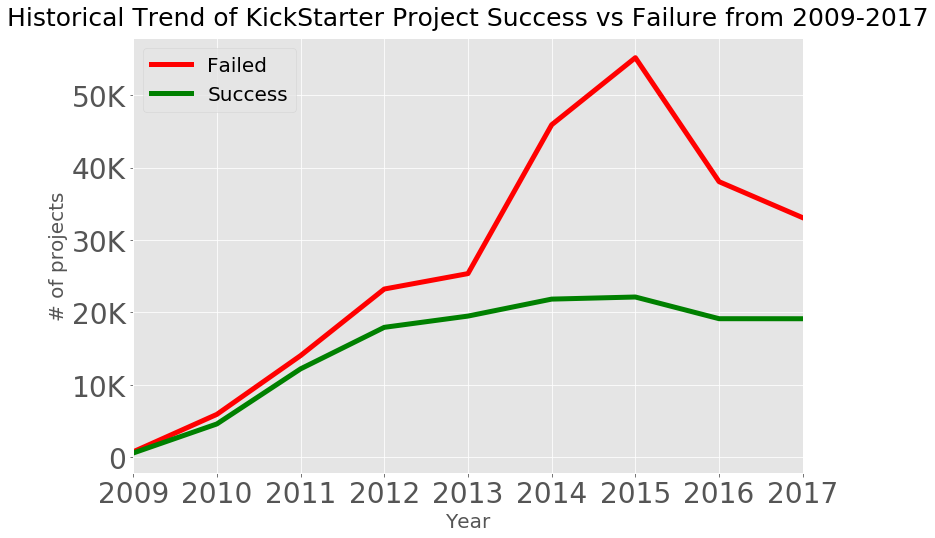

In [55]:
plt.style.use('ggplot')
fig1=failed_proj_year.plot(kind='line', fontsize=28, grid=True, linewidth=5, figsize=(12,8), color = "red")
fig2=succ_proj_year.plot(kind='line', fontsize=28, grid=True, linewidth=5, color="green")
plt.title("Historical Trend of KickStarter Project Success vs Failure from 2009-2017", fontsize=25, y=1.015)
plt.xlabel("Year", fontsize=20)
plt.ylabel("# of projects", fontsize=20)
fig1.yaxis.set_major_formatter(plt.FuncFormatter(fmt_x))
plt.legend(['Failed', 'Success'], fontsize=20)
plt.show()

### The spike in project count from 2013 to 2015 was not accompanied by an increase in pledges as nearly all the new project volume were failures.

## ML Classification Model

In [56]:
# def RFC_model(randomState, X_train, X_test, y_train, y_test, rand_forest):
#     '''
#     INPUT:
#             randomState - the random state parameter for random forest classifier
#             X_train - training set split for the independent variables
#             X_test - testing set split for independent variables
#             y_train - training set split for the dependent variables
#             y_test - testing set split for the dependent variables
#     OUTPUT: prints accuracy of the random forest classifier
#     '''
#     rand_forest = RandomForestClassifier()
#     rand_forest.fit(X_train, y_train)
#     forest_test_predictions = rand_forest.predict(X_test)
#     print(accuracy_score(y_test, forest_test_predictions))


In [57]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df_2018.drop(['success'], axis='columns').values,
                                                    encoded_df_2018.success, 
                                                    test_size=0.2)

In [58]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
forest_test_predictions = rand_forest.predict(X_test)
print(accuracy_score(y_test, forest_test_predictions))

/Users/bhavinivyas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9941372981395165


In [59]:
#importance of features rounded to nearest 3 decimals
rand_forest.feature_importances_.round(3)

array([0.308, 0.302, 0.253, 0.021, 0.001, 0.001, 0.   , 0.001, 0.003,
       0.001, 0.001, 0.001, 0.003, 0.   , 0.006, 0.   , 0.001, 0.005,
       0.003, 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.001, 0.   , 0.   , 0.   , 0.001, 0.081])

This model does pretty well, however we have included the usd_pledged_real and backers features in this which might be skewing the results. Remember that usd_pledged_real and backers were very highly correlated with success (obviously).

Lets remove this variable and see how the model does.

In [60]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    encoded_df_2018.drop(['success', 'usd_pledged_real', 'backers'], axis='columns').values, 
    encoded_df_2018.success, test_size=0.2, random_state=0)
# RFC_model(42, X_train_2, X_test_2, y_train_2, y_test_2, rand_forest)

In [61]:
rand_forest_2 = RandomForestClassifier()
rand_forest_2.fit(X_train_2, y_train_2)
forest_test_predictions = rand_forest_2.predict(X_test_2)
print(accuracy_score(y_test_2, forest_test_predictions))

/Users/bhavinivyas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7968388945373879


In [62]:
#importance of features rounded to nearest 3 decimals
rand_forest_2.feature_importances_.round(3)

array([0.209, 0.187, 0.002, 0.005, 0.002, 0.002, 0.003, 0.003, 0.003,
       0.002, 0.004, 0.001, 0.007, 0.002, 0.002, 0.005, 0.004, 0.   ,
       0.002, 0.   , 0.002, 0.   , 0.001, 0.001, 0.001, 0.001, 0.003,
       0.   , 0.   , 0.001, 0.   , 0.   , 0.001, 0.001, 0.002, 0.001,
       0.001, 0.   , 0.004, 0.535])

In [64]:
def print_important_features(features, df):
    '''
    INPUT: 
        features- the column number of feature you want to print
        df - the df you want to do this operation on
    OUTPU: prints the name of each feature that you have chosen
    '''
    for col in features:
        print(df.columns[col])


In [65]:
print_important_features([0,2,13], encoded_df_2018.drop(['success', 'usd_pledged_real', 'backers'], axis='columns'))

usd_goal_real
main_category_Art
main_category_Photography


In [66]:
#grid search to optimize random forest classifier
parameters={'n_estimators':[5,10,15,20],
            'max_depth':[None,2,5,10,15],
            'min_samples_split':[2, 4, 8]}
clf = RandomForestClassifier(random_state=42)

In [67]:
scorer = make_scorer(accuracy_score)

In [68]:
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

In [ ]:
grid_fit = grid_obj.fit(X_train_2, y_train_2)

/Users/bhavinivyas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
best_clf = grid_fit.best_estimator_

In [ ]:
predictions = best_clf.predict(X_test_2)

In [ ]:
print(accuracy_score(y_test_2, predictions))

In [ ]:
best_clf.feature_importances_.round(3)

In [ ]:
#which features were most important in model
print_important_features([0,2,4,8,13,17], df_encoded.drop(['success', 'usd_pledged_real', 'backers'], axis='columns'))